In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Replace 'movies.csv' with the path to your dataset
df = pd.read_csv("movies.csv")

# View the first few rows of the data
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [20]:
# See all column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None
Poster_Link        0
Series_Titl

In [38]:
print(df.columns)



Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [24]:
df.rename(columns={"revenue (millions)": "revenue"}, inplace=True)


In [26]:
df = df.dropna()


In [28]:
print(df.head())


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

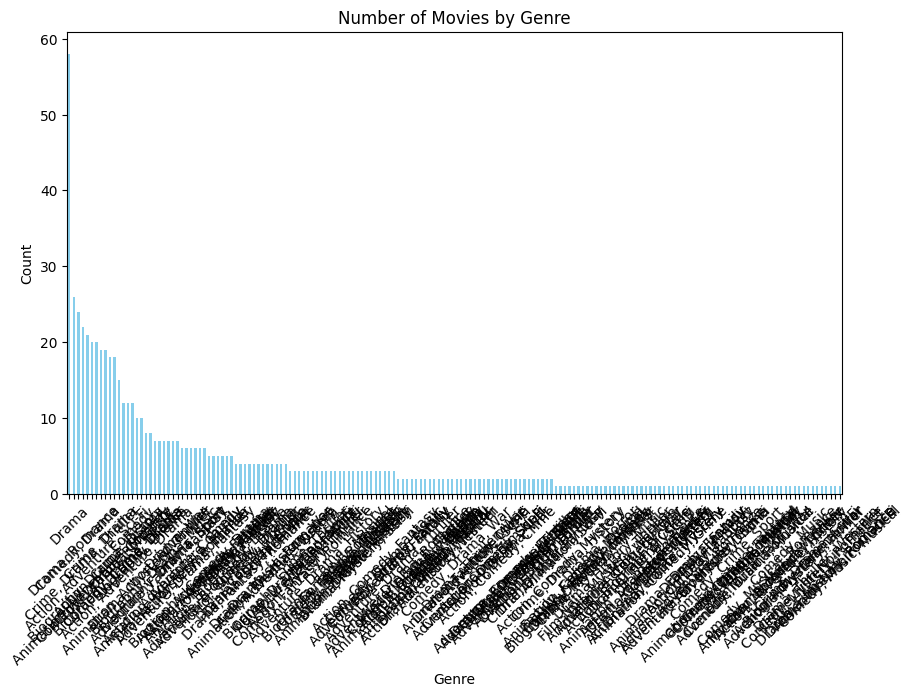

In [40]:
genre_counts = df['Genre'].value_counts()

# Plot a bar chart
genre_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


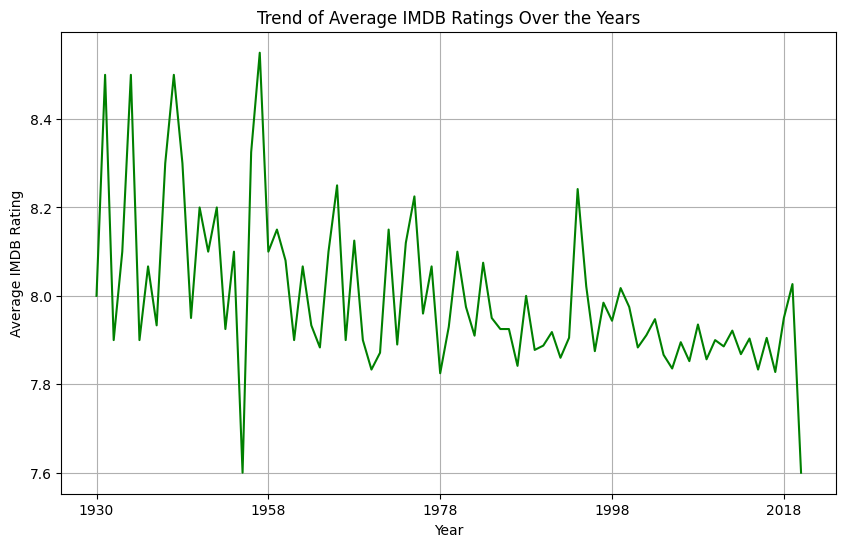

In [50]:
# Rename 'Released_Year' to 'year'
df.rename(columns={"Released_Year": "year"}, inplace=True)

# Group by year and calculate average IMDB rating
avg_ratings = df.groupby('year')['IMDB_Rating'].mean()

# Plot a line graph
avg_ratings.plot(kind='line', figsize=(10, 6), color='green')
plt.title("Trend of Average IMDB Ratings Over the Years")
plt.xlabel("Year")
plt.ylabel("Average IMDB Rating")
plt.grid(True)
plt.show()


C:\Users\Laura Silola\AppData\Local\Temp\ipykernel_14944\2213297185.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gross', y='Series_Title', data=top_revenue, palette='viridis')


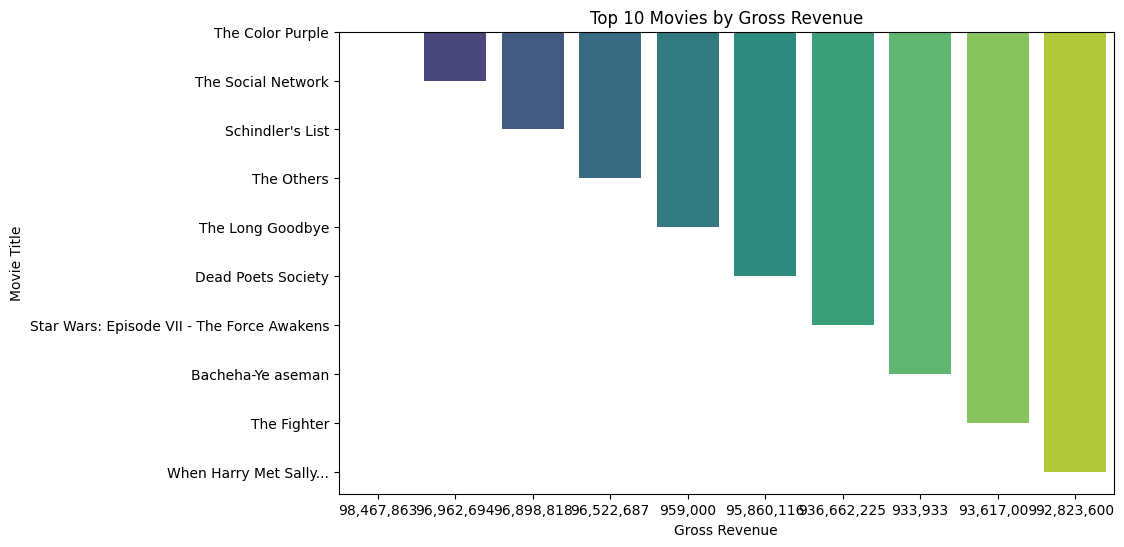

In [54]:
# Sort by Gross and select top 10
top_revenue = df.sort_values('Gross', ascending=False).head(10)

# Bar plot for top grossing movies
plt.figure(figsize=(10, 6))
sns.barplot(x='Gross', y='Series_Title', data=top_revenue, palette='viridis')
plt.title("Top 10 Movies by Gross Revenue")
plt.xlabel("Gross Revenue")
plt.ylabel("Movie Title")
plt.show()


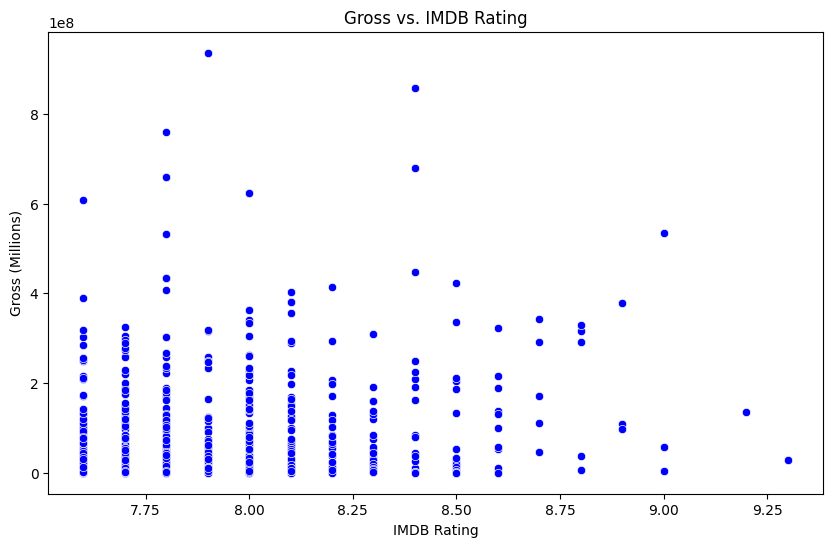

In [72]:
# Clean the Gross column
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Drop rows with missing Gross
df = df.dropna(subset=['Gross'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, color="blue")
plt.title("Gross vs. IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Gross (Millions)")
plt.show()